In [26]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from IPython.display import display, HTML

#HTML(df.to_html())
#display(df)

hpi_red = '#b00639'
hpi_blue = '#007a9e'

def get_column_names(cached): 
    file_name = 'data_structure_query_' + cached + '_results.csv.json'
    table_info = json.load(open(file_name,'r'))
    column_names = []
    for column in table_info["columns"]:
        column_names.append(column["name"])
    return column_names

def get_results(cached):
    file_name = 'data_structure_query_' + cached + '_results.csv'
    return pd.read_csv(file_name, header=None, names=get_column_names(cached))

# Columns: data_type, data_structure, sample_size, value_count, run_time
def select(data, data_type, data_structure):
    return data[(data.data_type == data_type) & (data.data_structure == data_structure)]

def barplot(cached, data_type):
    results = get_results(cached)
    filter_result = select(results, data_type, "filter")["run_time"].iloc[0]
    dictionary_result = select(results, data_type, "dictionary")["run_time"].iloc[0]
    
    fig, ax = plt.subplots()
    plt.rc('xtick', labelsize=8)
    title = cached +  " Data Structure Lookup Runtime: " + data_type
    ax.set_title(title)
    ax.yaxis.grid()
    ax.set_axisbelow(True)
    bars = [dictionary_result, filter_result]
    #plt.yticks(np.arange(0, max(bars)*1.1, 500000))
    labels=["Dictionary", "Filter"]
    plt.bar(range(2), bars, width=1/1.5, color=hpi_red, tick_label=labels)
    file_name = title.replace(" ", "_").replace(":", "_")
    plt.savefig('plots/data_structure_query/{}.pgf'.format(file_name))
    plt.savefig('plots/data_structure_query/{}.pdf'.format(file_name))
    plt.show()

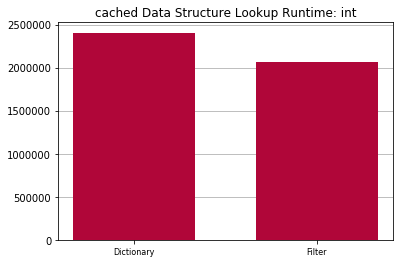

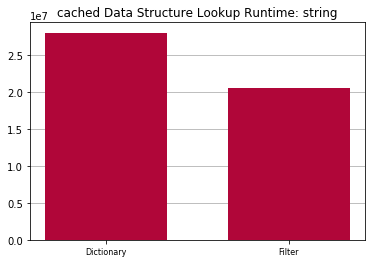

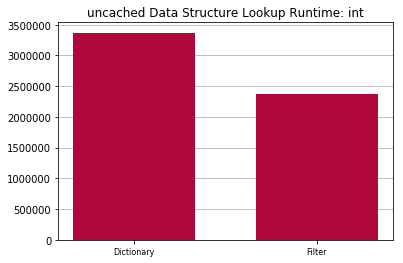

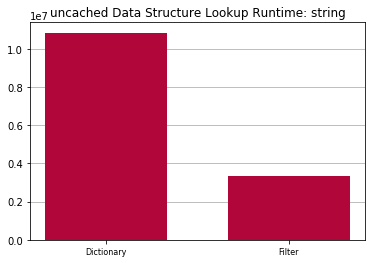

In [28]:
barplot("cached", "int")
barplot("cached", "string")
barplot("uncached", "int")
barplot("uncached", "string")